In [1]:
import os
from tqdm import tqdm
import pandas as pd
import librosa as lr
import librosa.feature as lrf
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
import torch
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.utils

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [18]:
from tqdm import tqdm
import cv2

#/content/drive/.shortcut-targets-by-id/1t2m1B5Db93pdH3FPEMuGW2WGR73BeWnR/COMP411/Project
#/content/drive/MyDrive/Project/images_custom/

# Insert Path to where the image_custom folder is
genres_path = "/content/drive/MyDrive/Project/images_custom/"
batch_size = 32
img_height = 432
img_width = 288

X = []
Y = []

genres = os.listdir(genres_path)
for genre in genres:
  if genre == '.DS_Store':
    continue
  genre_path = genres_path + genre + "/"
  for song_path in os.listdir(genre_path):
    img = cv2.imread(genre_path + song_path)
    if img.shape != (288, 432, 3):
      print(img.shape)
    X.append(img)
    Y.append(song_path.split('_')[0])
X = np.array(X)
Y = np.array(Y)

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
genre_list = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
Y = label_encoder.fit_transform(Y)

In [20]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X,Y, test_size = 0.2)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
# check if the image shape and training split size is correct
# overall shape should be (799, 288, 432, 3)
print(X_train.shape)

(799, 288, 432, 3)


## Model Architecture

In [ ]:
num_classes = len(genre_list)
model = Sequential([
  layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3)),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3)),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3)),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])


"""
num_classes = len(genre_list)
model = Sequential([
  layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3)),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3)),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3)),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])
"""

#model = keras.models.Sequential([
#    keras.layers.Dense(512, activation="relu", input_shape=((288, 432, 3))),
#    keras.layers.Dropout(0.2),
#    
#    keras.layers.Dense(256,activation="relu"),
#    keras.layers.Dropout(0.2),
#    
#    keras.layers.Dense(128,activation="relu"),
#    keras.layers.Dropout(0.2),
#    
#    keras.layers.Dense(64,activation="relu"),
#    keras.layers.Dropout(0.2),
#    
#    keras.layers.Dense(10, activation="softmax"),
#    
#])

"\nnum_classes = len(genre_list)\nmodel = Sequential([\n  layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform'),\n  layers.MaxPooling2D(),\n  layers.BatchNormalization(),\n  layers.Conv2D(32, (3,3)),\n  layers.Dropout(0.2),\n  layers.MaxPooling2D(),\n  layers.BatchNormalization(),\n  layers.Conv2D(32, (3,3)),\n  layers.MaxPooling2D(),\n  layers.BatchNormalization(),\n  layers.Conv2D(32, (3,3)),\n  layers.Dropout(0.2),\n  layers.MaxPooling2D(),\n  layers.BatchNormalization(),\n  layers.Flatten(),\n  layers.Dense(32, activation='relu'),\n  layers.Dense(num_classes, activation = 'softmax')\n])\n"

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training

In [ ]:
epochs = 100
history = model.fit(
  X_train,
  y_train,
  epochs=epochs,
  batch_size = 64,
  validation_data=(X_test, y_test)
)

Epoch 1/100
13/13 [==============================] - 15s 350ms/step - loss: 2.7868 - accuracy: 0.1589 - val_loss: 4.3590 - val_accuracy: 0.1100
Epoch 2/100
13/13 [==============================] - 3s 196ms/step - loss: 2.0379 - accuracy: 0.2641 - val_loss: 6.6434 - val_accuracy: 0.1100
Epoch 3/100
13/13 [==============================] - 3s 200ms/step - loss: 1.9597 - accuracy: 0.2365 - val_loss: 4.8510 - val_accuracy: 0.1950
Epoch 4/100
13/13 [==============================] - 3s 201ms/step - loss: 1.7345 - accuracy: 0.3429 - val_loss: 4.1340 - val_accuracy: 0.2200
Epoch 5/100
13/13 [==============================] - 3s 198ms/step - loss: 1.6972 - accuracy: 0.3692 - val_loss: 3.8780 - val_accuracy: 0.1100
Epoch 6/100
13/13 [==============================] - 3s 201ms/step - loss: 1.6191 - accuracy: 0.3605 - val_loss: 3.0399 - val_accuracy: 0.1400
Epoch 7/100
13/13 [==============================] - 3s 201ms/step - loss: 1.4415 - accuracy: 0.4343 - val_loss: 3.7307 - val_accuracy: 0.140

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 143, 215, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 143, 215, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 213, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 106, 32)      0         
 2D)                                                             
                                                        

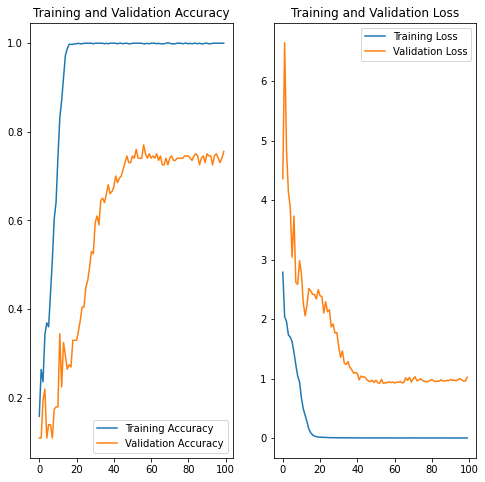

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Project')

## Confusion Matrix

Due to high RAM usage, confusion matrix is obtained by loading the model on a fresh collab instance to prevent crashes.



In [15]:
#model = keras.models.load_model('/content/drive/MyDrive/Project/')
model = keras.models.load_model('/content/drive/.shortcut-targets-by-id/1t2m1B5Db93pdH3FPEMuGW2WGR73BeWnR/COMP411/Project/')

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Predict
y_prediction = model.predict(X_test).round()
#score = model.evaluate(X_train, y_train)
#print(score)

#Create confusion matrix and normalizes it over predicted (columns)
matrix = matrix = confusion_matrix(y_test, np.argmax(y_prediction, axis=1))

7/7 [==============================] - 0s 43ms/step


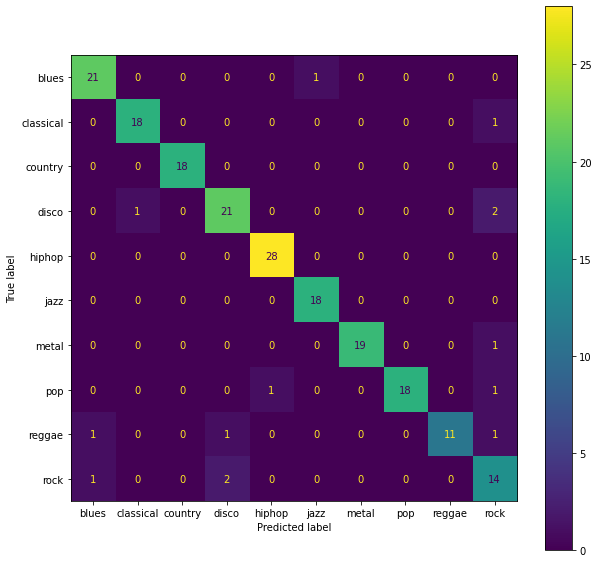

In [38]:
display = ConfusionMatrixDisplay(matrix, display_labels = genre_list)
fig, ax = plt.subplots(figsize=(10, 10))
display.plot(ax=ax)